In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
import pyswarms as ps
import joblib

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt

## LOADING DATASETS FOR TRAINING

In [2]:
X_train = pd.read_csv("X_train.csv", low_memory=False)
X_test = pd.read_csv("X_test.csv", low_memory=False)

y_train = pd.read_csv("y_train.csv", low_memory=False)
y_test = pd.read_csv("y_test.csv", low_memory=False)

## CODE FOR DISPLAYING THE CONFUSION MATRIX AND DISPLAYING MODEL ACCURACY

In [3]:
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def model_accuracy(model):
    y_preds=model.predict(X_test)
    matrix = metrics.confusion_matrix(y_test, y_preds, labels=model.classes_)
    ConfusionMatrixDisplay.from_predictions(y_test, y_preds, display_labels=model.classes_, xticks_rotation='vertical')
    print(matrix)
    return accuracy_score(y_test, y_preds)

# BAGGING CLASSIFIERS

## RANDOM FOREST CLASSIFIER

C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[[ 880932       0       0       0       0       0]
 [      0  247834       0       0       0       0]
 [      0       0    3175       0       2       0]
 [      0       0       0    5323       0       0]
 [      0       7       0       0 1490300       0]
 [      0       0       0       0       0   16685]]


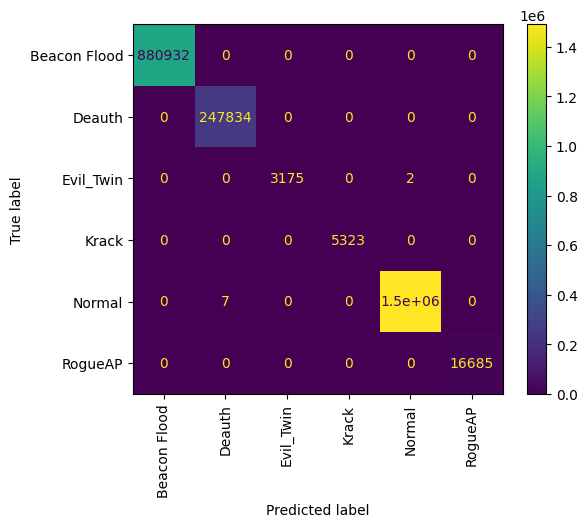

0.9999965963986873


In [4]:
forest=RandomForestClassifier(n_jobs=-1, n_estimators=50, criterion='entropy')
forest.fit(X_train,y_train)
acc = model_accuracy(forest)
plt.savefig('rf_cm_new.eps')
plt.show()
print(acc)

C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[[ 880932       0       0       0       0       0]
 [      0  247834       0       0       0       0]
 [      0       0    3175       0       2       0]
 [      0       0       0    5323       0       0]
 [      0      26       0       0 1490281       0]
 [      0       0       0       0       0   16685]]


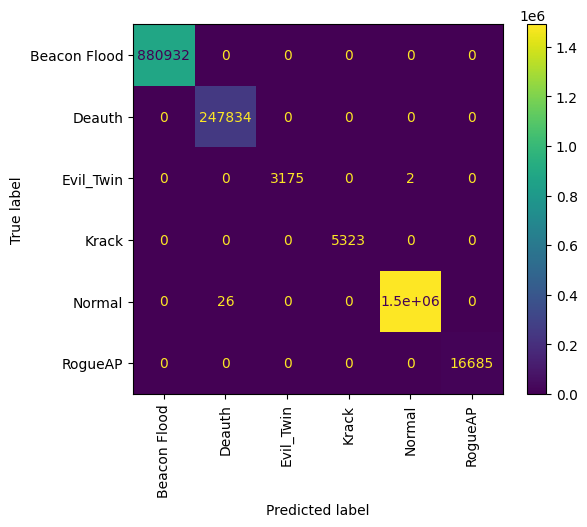

0.9999894110181382
Classification Report:
              precision    recall  f1-score   support

Beacon Flood       1.00      1.00      1.00    880932
      Deauth       1.00      1.00      1.00    247834
   Evil_Twin       1.00      1.00      1.00      3177
       Krack       1.00      1.00      1.00      5323
      Normal       1.00      1.00      1.00   1490307
     RogueAP       1.00      1.00      1.00     16685

    accuracy                           1.00   2644258
   macro avg       1.00      1.00      1.00   2644258
weighted avg       1.00      1.00      1.00   2644258

Random Forest Accuracy: 0.9999894110181382
Random Forest Precision: 0.9999822933411279
Random Forest Recall: 0.9998921715368865
Random Forest F1 Score: 0.999937215451939


['AWIDTEST_RandomForest_model.pkl']

In [5]:
forest=RandomForestClassifier(n_jobs=-1, n_estimators=250, max_depth=20, random_state=42)
forest.fit(X_train,y_train)
acc = model_accuracy(forest)
plt.savefig('rf_cm_new1.eps')
plt.show()
print(acc)

# Generate predictions
forest_predictions = forest.predict(X_test)

# Generate classification report as dictionary
forest_report_dict = classification_report(y_test, forest_predictions, output_dict=True)

# Extract performance metrics
forest_accuracy = forest_report_dict['accuracy']
forest_precision = forest_report_dict['macro avg']['precision']
forest_recall = forest_report_dict['macro avg']['recall']
forest_f1_score = forest_report_dict['macro avg']['f1-score']

# Print classification report
print("Classification Report:")
print(classification_report(y_test, forest_predictions))

# Print extracted metrics
print(f"Random Forest Accuracy: {forest_accuracy}")
print(f"Random Forest Precision: {forest_precision}")
print(f"Random Forest Recall: {forest_recall}")
print(f"Random Forest F1 Score: {forest_f1_score}")

joblib.dump(forest, 'AWIDTEST_RandomForest_model.pkl')

# # Predict probabilities for each class
# forest_y_pred_prob = forest.predict_proba(X_test)

# # Convert y_test to 1D array if needed
# forest_y_test = np.array(y_test).ravel()


In [5]:
# Generate predictions
forest_predictions = forest.predict(X_test)

# Generate classification report as dictionary
forest_report_dict = classification_report(y_test, forest_predictions, output_dict=True)

# Extract performance metrics
forest_accuracy = forest_report_dict['accuracy']
forest_precision = forest_report_dict['macro avg']['precision']
forest_recall = forest_report_dict['macro avg']['recall']
forest_f1_score = forest_report_dict['macro avg']['f1-score']

# Print classification report
print("Classification Report:")
print(classification_report(y_test, forest_predictions))

# Print extracted metrics
print(f"Random Forest Accuracy: {forest_accuracy}")
print(f"Random Forest Precision: {forest_precision}")
print(f"Random Forest Recall: {forest_recall}")
print(f"Random Forest F1 Score: {forest_f1_score}")

# # Predict probabilities for each class
# forest_y_pred_prob = forest.predict_proba(X_test)

# # Convert y_test to 1D array if needed
# forest_y_test = np.array(y_test).ravel()


Classification Report:
              precision    recall  f1-score   support

Beacon Flood       1.00      1.00      1.00    880932
      Deauth       1.00      1.00      1.00    247834
   Evil_Twin       1.00      1.00      1.00      3177
       Krack       1.00      1.00      1.00      5323
      Normal       1.00      1.00      1.00   1490307
     RogueAP       1.00      1.00      1.00     16685

    accuracy                           1.00   2644258
   macro avg       1.00      1.00      1.00   2644258
weighted avg       1.00      1.00      1.00   2644258

Random Forest Accuracy: 0.9999965963986873
Random Forest Precision: 0.9999950690126135
Random Forest Recall: 0.9998942963787255
Random Forest F1 Score: 0.9999446661442059


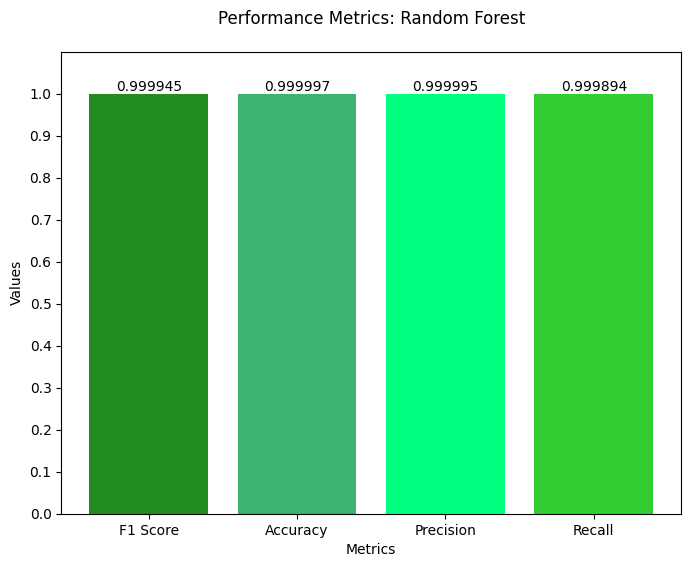

In [6]:
# Data for visualization
labels = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
values = [forest_f1_score, forest_accuracy, forest_precision, forest_recall]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['forestgreen', 'mediumseagreen', 'springgreen', 'limegreen'])

# Adding title and labels with padding
plt.title('Performance Metrics: Random Forest', pad=20)
plt.xlabel('Metrics')
plt.ylabel('Values')

# Setting y-axis limit from 0 to 1
plt.ylim(0, 1.1)

# Setting tick locations on the y-axis
plt.yticks([i/10 for i in range(11)])  # Tick locations from 0.0 to 1.0 at intervals of 0.1

# Adding the value at the end of each bar with 6 decimal points
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.6f}'.format(value), 
             ha='center', va='bottom')

# Displaying the plot
plt.show()


In [8]:
joblib.dump(forest, 'BaggingClassifier_RandomForest_model.pkl')

['BaggingClassifier_RandomForest_model.pkl']

## TESTING: RANDOM FOREST WITH K-FOLD CROSS VALIDATION (6 FOLDS)

In [21]:
# Convert y_train and y_test to 1D NumPy arrays
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Load the saved RandomForest model
random_forest_model = joblib.load('BaggingClassifier_RandomForest_model.pkl')

# Define number of folds
k_folds = 10
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Lists to store cross-validation performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform K-Fold CV on X_train, y_train
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the RandomForest model on the fold
    random_forest_model.fit(X_train_fold, y_train_fold)

    # Make predictions on validation fold
    y_val_pred = random_forest_model.predict(X_val_fold)

    # Compute metrics for this fold
    accuracy_scores.append(accuracy_score(y_val_fold, y_val_pred))
    precision_scores.append(precision_score(y_val_fold, y_val_pred, average='macro'))
    recall_scores.append(recall_score(y_val_fold, y_val_pred, average='macro'))
    f1_scores.append(f1_score(y_val_fold, y_val_pred, average='macro'))

# Compute average cross-validation metrics
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

Average Accuracy (CV): 1.0000
Average Precision (CV): 0.9998
Average Recall (CV): 0.9997
Average F1 Score (CV): 0.9998

Final Evaluation on X_test:
Test Accuracy: 1.0000
Test Precision: 1.0000
Test Recall: 0.9998
Test F1 Score: 0.9999


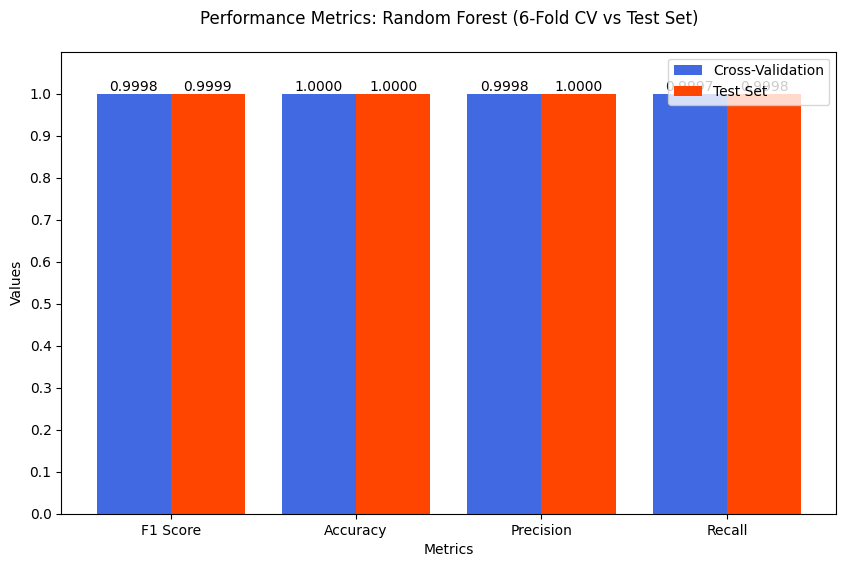

In [22]:
# Print Cross-Validation results
print(f"Average Accuracy (CV): {avg_accuracy:.4f}")
print(f"Average Precision (CV): {avg_precision:.4f}")
print(f"Average Recall (CV): {avg_recall:.4f}")
print(f"Average F1 Score (CV): {avg_f1:.4f}")

# Final evaluation on X_test, y_test
y_test_pred = random_forest_model.predict(X_test)

# Compute final test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print("\nFinal Evaluation on X_test:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# Plot performance metrics
labels = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
cv_values = [avg_f1, avg_accuracy, avg_precision, avg_recall]
test_values = [test_f1, test_accuracy, test_precision, test_recall]

plt.figure(figsize=(10, 6))
bar_width = 0.4
x = np.arange(len(labels))

# Plot bars for cross-validation metrics
plt.bar(x - bar_width/2, cv_values, bar_width, label='Cross-Validation', color='royalblue')

# Plot bars for test set metrics
plt.bar(x + bar_width/2, test_values, bar_width, label='Test Set', color='orangered')

# Adding labels and formatting
plt.title('Performance Metrics: Random Forest (6-Fold CV vs Test Set)', pad=20)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(x, labels)
plt.ylim(0, 1.1)
plt.yticks([i/10 for i in range(11)])
plt.legend()

# Adding the value at the end of each bar
for i in range(len(labels)):
    plt.text(x[i] - bar_width/2, cv_values[i], f"{cv_values[i]:.4f}", ha='center', va='bottom')
    plt.text(x[i] + bar_width/2, test_values[i], f"{test_values[i]:.4f}", ha='center', va='bottom')

plt.show()

###### EXTRA TREES CLASSIFIER

C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[[ 880932       0       0       0       0       0]
 [      0  247834       0       0       0       0]
 [      0       0    3176       0       1       0]
 [      0       0       0    5323       0       0]
 [      0       0       0       0 1490307       0]
 [      0       0       0       0       0   16685]]


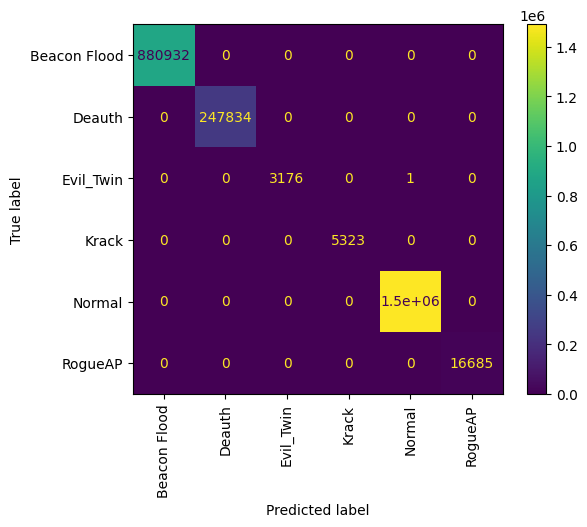

0.9999996218220764


In [9]:
from sklearn.ensemble import ExtraTreesClassifier

# Instantiate the ExtraTreesClassifier object
extraTrees = ExtraTreesClassifier()

# Fit the classifier to the training data
extraTrees.fit(X_train, y_train)

# Evaluate the model
acc = model_accuracy(extraTrees)
plt.savefig('extraTrees_cm_new.eps')
plt.show()
print(acc)

In [10]:
# Generate predictions
extraTrees_predictions = extraTrees.predict(X_test)

# Generate classification report
extraTrees_report = classification_report(y_test, extraTrees_predictions)

# Print classification report
print("Classification Report:")
print(extraTrees_report)

# Extract performance metrics
extraTrees_accuracy = forest_report_dict['accuracy']
extraTrees_precision = forest_report_dict['macro avg']['precision']
extraTrees_recall = forest_report_dict['macro avg']['recall']
extraTrees_f1_score = forest_report_dict['macro avg']['f1-score']

# # Predict probabilities for each class
# extraTrees_y_proba = extraTrees.predict_proba(X_test)

# # Convert y_test to 1D array if needed
# extraTrees_y_test = np.array(y_test).ravel()


# Print extracted metrics
print(f"Extra Trees Model Accuracy: {extraTrees_accuracy}")
print(f"Extra Trees Model Precision: {extraTrees_precision}")
print(f"Extra Trees Model Recall: {extraTrees_recall}")
print(f"Extra Trees Model F1 Score: {extraTrees_f1_score}")


Classification Report:
              precision    recall  f1-score   support

Beacon Flood       1.00      1.00      1.00    880932
      Deauth       1.00      1.00      1.00    247834
   Evil_Twin       1.00      1.00      1.00      3177
       Krack       1.00      1.00      1.00      5323
      Normal       1.00      1.00      1.00   1490307
     RogueAP       1.00      1.00      1.00     16685

    accuracy                           1.00   2644258
   macro avg       1.00      1.00      1.00   2644258
weighted avg       1.00      1.00      1.00   2644258

Extra Trees Model Accuracy: 0.9999965963986873
Extra Trees Model Precision: 0.9999950690126135
Extra Trees Model Recall: 0.9998942963787255
Extra Trees Model F1 Score: 0.9999446661442059


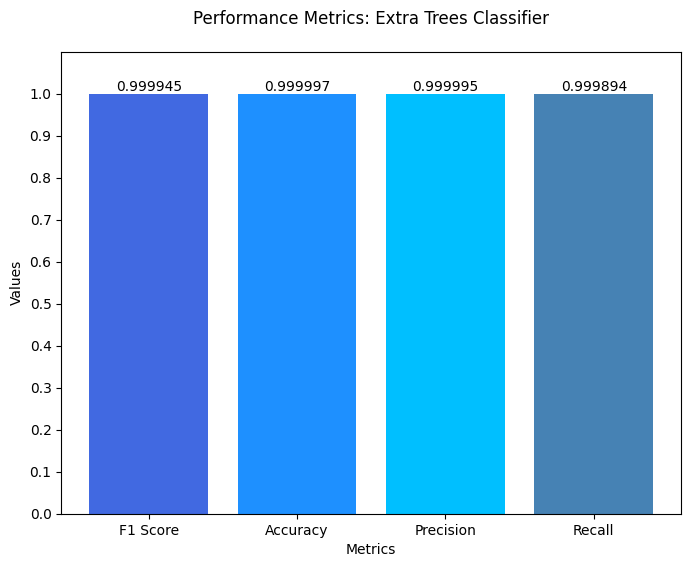

In [11]:
# Data for visualization
labels = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
values = [extraTrees_f1_score, extraTrees_accuracy, extraTrees_precision, extraTrees_recall]

# Plotting Performance Metrics Bar Chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['royalblue', 'dodgerblue', 'deepskyblue', 'steelblue'])

# Adding title and labels with padding
plt.title('Performance Metrics: Extra Trees Classifier', pad=20)
plt.xlabel('Metrics')
plt.ylabel('Values')

# Setting y-axis limit from 0 to 1
plt.ylim(0, 1.1)

# Setting tick locations on the y-axis
plt.yticks([i/10 for i in range(11)])  # Tick locations from 0.0 to 1.0 at intervals of 0.1

# Adding the value at the end of each bar with 6 decimal points
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.6f}'.format(value), 
             ha='center', va='bottom')

# Displaying the bar plot
plt.show()

In [12]:
joblib.dump(extraTrees, 'BaggingClassifier_ExtraTrees_model.pkl')

['BaggingClassifier_ExtraTrees_model.pkl']

# BOOSTING CLASSIFIERS

## CAT BOOST

C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

[[ 880932       0       0       0       0       0]
 [      0  247826       0       0       8       0]
 [      0       0    3175       0       2       0]
 [      0       0       0    5323       0       0]
 [      0      44       1       0 1490262       0]
 [      0       0       0       0       0   16685]]


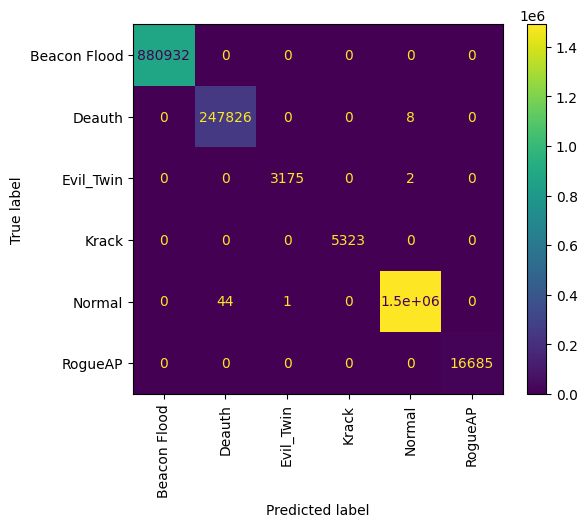

0.9999792002142


In [22]:
# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train CatBoost
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train, verbose=False, plot=True)
acc = model_accuracy(catboost_model)
plt.savefig('catboost_cm_new.eps')
plt.show()
print(acc)

In [23]:
# Generate predictions
catboost_predictions = catboost_model.predict(X_test)

# Generate classification report as dictionary
catboost_report_dict = classification_report(y_test, catboost_predictions, output_dict=True)

# Extract performance metrics
catboost_accuracy = catboost_report_dict['accuracy']
catboost_precision = catboost_report_dict['macro avg']['precision']
catboost_recall = catboost_report_dict['macro avg']['recall']
catboost_f1_score = catboost_report_dict['macro avg']['f1-score']

# Print classification report
print("Classification Report:")
print(classification_report(y_test, catboost_predictions))

# Print extracted metrics
print(f"CatBoost Model Accuracy: {catboost_accuracy}")
print(f"CatBoost Model Precision: {catboost_precision}")
print(f"CatBoost Model Recall: {catboost_recall}")
print(f"CatBoost Model F1 Score: {catboost_f1_score}")


Classification Report:
              precision    recall  f1-score   support

Beacon Flood       1.00      1.00      1.00    880932
      Deauth       1.00      1.00      1.00    247834
   Evil_Twin       1.00      1.00      1.00      3177
       Krack       1.00      1.00      1.00      5323
      Normal       1.00      1.00      1.00   1490307
     RogueAP       1.00      1.00      1.00     16685

    accuracy                           1.00   2644258
   macro avg       1.00      1.00      1.00   2644258
weighted avg       1.00      1.00      1.00   2644258

CatBoost Model Accuracy: 0.9999792002142
CatBoost Model Precision: 0.9999168193248161
CatBoost Model Recall: 0.999884666749869
CatBoost Model F1 Score: 0.9999007380079239


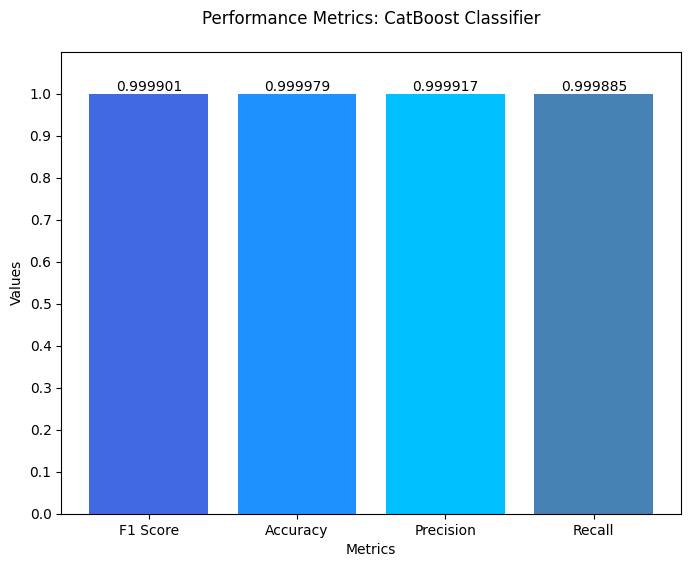

In [24]:
# Data for visualization
labels = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
values = [catboost_f1_score, catboost_accuracy, catboost_precision, catboost_recall]

# Plotting Performance Metrics Bar Chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['royalblue', 'dodgerblue', 'deepskyblue', 'steelblue'])

# Adding title and labels with padding
plt.title('Performance Metrics: CatBoost Classifier', pad=20)
plt.xlabel('Metrics')
plt.ylabel('Values')

# Setting y-axis limit from 0 to 1
plt.ylim(0, 1.1)

# Setting tick locations on the y-axis
plt.yticks([i/10 for i in range(11)])  # Tick locations from 0.0 to 1.0 at intervals of 0.1

# Adding the value at the end of each bar with 6 decimal points
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.6f}'.format(value), 
             ha='center', va='bottom')

# Displaying the bar plot
plt.show()


In [25]:
joblib.dump(catboost_model, 'BoostingClassifier_catboost_model.pkl')

['BoostingClassifier_catboost_model.pkl']

## GRADIENT BOOSTING CLASSIFIER

C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 880932       0       0       0       0       0]
 [      0  247834       0       0       0       0]
 [      0       0    3029       0     148       0]
 [      0       0      98    5212      13       0]
 [      0     114     993       0 1489200       0]
 [      0       0       0       0       0   16685]]


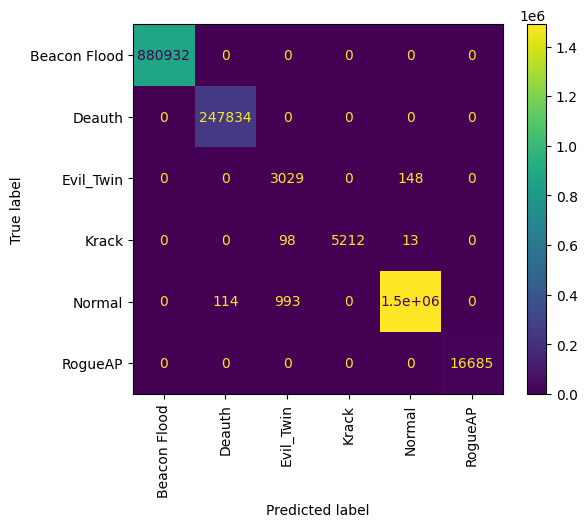

0.9994834089563122


In [5]:
from sklearn.ensemble import GradientBoostingClassifier


gradient_boosting=GradientBoostingClassifier()
gradient_boosting.fit(X_train,y_train)
acc = model_accuracy(gradient_boosting)
plt.savefig('g_boost_cm_new.eps')
plt.show()
print(acc)

In [7]:
# Generate predictions
gradient_boosting_predictions = gradient_boosting.predict(X_test)

# Generate classification report as dictionary
gradient_boosting_report_dict = classification_report(y_test, gradient_boosting_predictions, output_dict=True)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, gradient_boosting_predictions))

# Extract performance metrics
gradient_boosting_accuracy = gradient_boosting_report_dict['accuracy']
gradient_boosting_precision = gradient_boosting_report_dict['macro avg']['precision']
gradient_boosting_recall = gradient_boosting_report_dict['macro avg']['recall']
gradient_boosting_f1_score = gradient_boosting_report_dict['macro avg']['f1-score']

# Print extracted metrics
print(f"Gradient Boosting Model Accuracy: {gradient_boosting_accuracy}")
print(f"Gradient Boosting Model Precision: {gradient_boosting_precision}")
print(f"Gradient Boosting Model Recall: {gradient_boosting_recall}")
print(f"Gradient Boosting Model F1 Score: {gradient_boosting_f1_score}")


Classification Report:
              precision    recall  f1-score   support

Beacon Flood       1.00      1.00      1.00    880932
      Deauth       1.00      1.00      1.00    247834
   Evil_Twin       0.74      0.95      0.83      3177
       Krack       1.00      0.98      0.99      5323
      Normal       1.00      1.00      1.00   1490307
     RogueAP       1.00      1.00      1.00     16685

    accuracy                           1.00   2644258
   macro avg       0.96      0.99      0.97   2644258
weighted avg       1.00      1.00      1.00   2644258

Gradient Boosting Model Accuracy: 0.9994834089563122
Gradient Boosting Model Precision: 0.9557710501471294
Gradient Boosting Model Recall: 0.9886365781789106
Gradient Boosting Model F1 Score: 0.9698353992366552


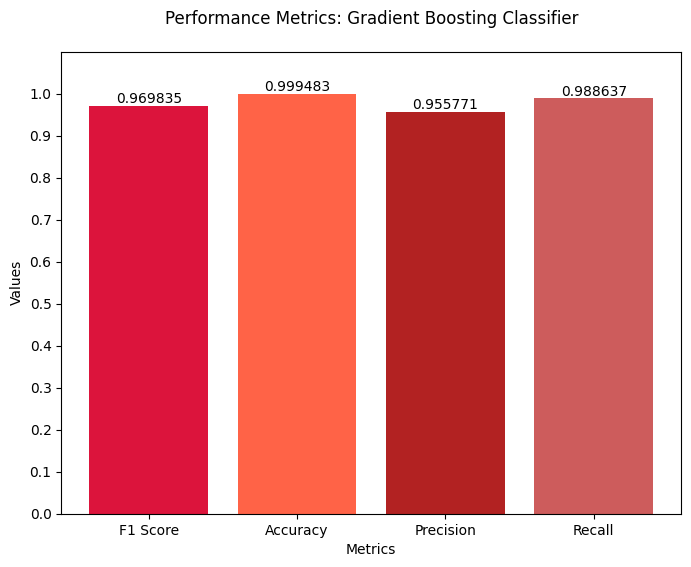

In [8]:
# Data for visualization
labels = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
values = [gradient_boosting_f1_score, gradient_boosting_accuracy, gradient_boosting_precision, gradient_boosting_recall]

# Plotting Performance Metrics Bar Chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['crimson', 'tomato', 'firebrick', 'indianred'])

# Adding title and labels with padding
plt.title('Performance Metrics: Gradient Boosting Classifier', pad=20)
plt.xlabel('Metrics')
plt.ylabel('Values')

# Setting y-axis limit from 0 to 1
plt.ylim(0, 1.1)

# Setting tick locations on the y-axis
plt.yticks([i/10 for i in range(11)])  # Tick locations from 0.0 to 1.0 at intervals of 0.1

# Adding the value at the end of each bar with 6 decimal points
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.6f}'.format(value), 
             ha='center', va='bottom')

# Displaying the bar plot
plt.show()

In [10]:
# SAVING THE GRADIENT_BOOSTING MODEL

joblib.dump(gradient_boosting, 'BoostingClassifier_gradient_boosting_model.pkl')

['BoostingClassifier_gradient_boosting_model.pkl']

## ADA BOOST CLASSIFIER

C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[ 880932       0       0       0       0       0]
 [ 247834       0       0       0       0       0]
 [      0       0       0       0    3177       0]
 [      0       0       0    5200     123       0]
 [ 264764       0       0   10923 1214620       0]
 [  16685       0       0       0       0       0]]


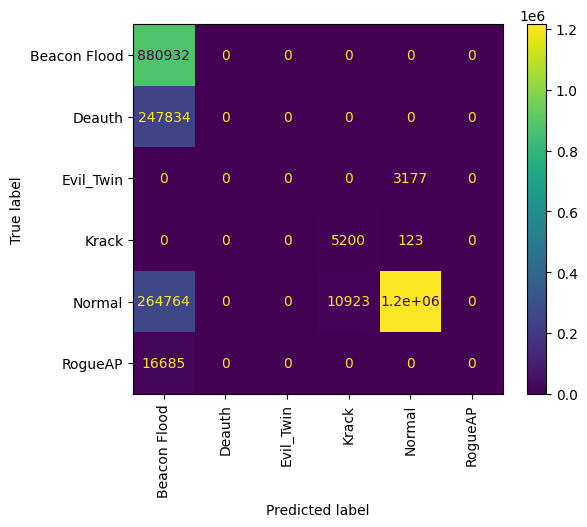

0.7944580294358569


In [13]:
from sklearn.ensemble import AdaBoostClassifier


ada_boost=AdaBoostClassifier()
ada_boost.fit(X_train,y_train)
acc = model_accuracy(ada_boost)
plt.savefig('ada_boost_cm_new.eps')
plt.show()
print(acc)

In [14]:
# Generate predictions
ada_boost_predictions = ada_boost.predict(X_test)

# Generate classification report as dictionary
ada_boost_report_dict = classification_report(y_test, ada_boost_predictions, output_dict=True)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, ada_boost_predictions))

# Extract performance metrics
ada_boost_accuracy = ada_boost_report_dict['accuracy']
ada_boost_precision = ada_boost_report_dict['macro avg']['precision']
ada_boost_recall = ada_boost_report_dict['macro avg']['recall']
ada_boost_f1_score = ada_boost_report_dict['macro avg']['f1-score']

# Print extracted metrics
print(f"AdaBoost Model Accuracy: {ada_boost_accuracy}")
print(f"AdaBoost Model Precision: {ada_boost_precision}")
print(f"AdaBoost Model Recall: {ada_boost_recall}")
print(f"AdaBoost Model F1 Score: {ada_boost_f1_score}")


C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Classification Report:


C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

Beacon Flood       0.62      1.00      0.77    880932
      Deauth       0.00      0.00      0.00    247834
   Evil_Twin       0.00      0.00      0.00      3177
       Krack       0.32      0.98      0.48      5323
      Normal       1.00      0.82      0.90   1490307
     RogueAP       0.00      0.00      0.00     16685

    accuracy                           0.79   2644258
   macro avg       0.32      0.47      0.36   2644258
weighted avg       0.77      0.79      0.76   2644258

AdaBoost Model Accuracy: 0.7944580294358569
AdaBoost Model Precision: 0.32408171678687386
AdaBoost Model Recall: 0.4653176686936489
AdaBoost Model F1 Score: 0.3584853412498084


C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


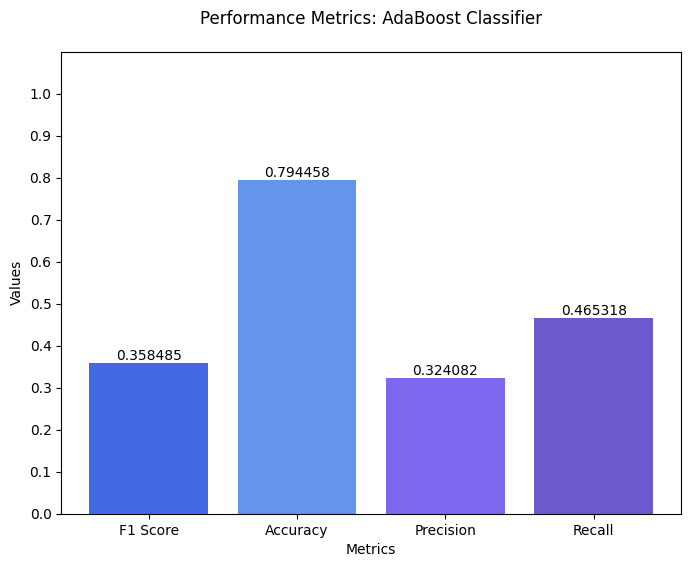

In [15]:
# Data for visualization
labels = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
values = [ada_boost_f1_score, ada_boost_accuracy, ada_boost_precision, ada_boost_recall]

# Plotting Performance Metrics Bar Chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['royalblue', 'cornflowerblue', 'mediumslateblue', 'slateblue'])

# Adding title and labels with padding
plt.title('Performance Metrics: AdaBoost Classifier', pad=20)
plt.xlabel('Metrics')
plt.ylabel('Values')

# Setting y-axis limit from 0 to 1
plt.ylim(0, 1.1)

# Setting tick locations on the y-axis
plt.yticks([i/10 for i in range(11)])  # Tick locations from 0.0 to 1.0 at intervals of 0.1

# Adding the value at the end of each bar with 6 decimal points
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.6f}'.format(value), 
             ha='center', va='bottom')

# Displaying the bar plot
plt.show()


In [16]:
joblib.dump(ada_boost, 'BoostingClassifier_ada_boost_model.pkl')

['BoostingClassifier_ada_boost_model.pkl']

## LIGHT GBM CLASSIFIER

C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.174783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1897
[LightGBM] [Info] Number of data points in the train set: 5368644, number of used features: 18
[LightGBM] [Info] Start training from score -1.100420
[LightGBM] [Info] Start training from score -2.365286
[LightGBM] [Info] Start training from score -6.665543
[LightGBM] [Info] Start training from score -6.219396
[LightGBM] [Info] Start training from score -0.573006
[LightGBM] [Info] Start training from score -5.074608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[[ 823167    4353    

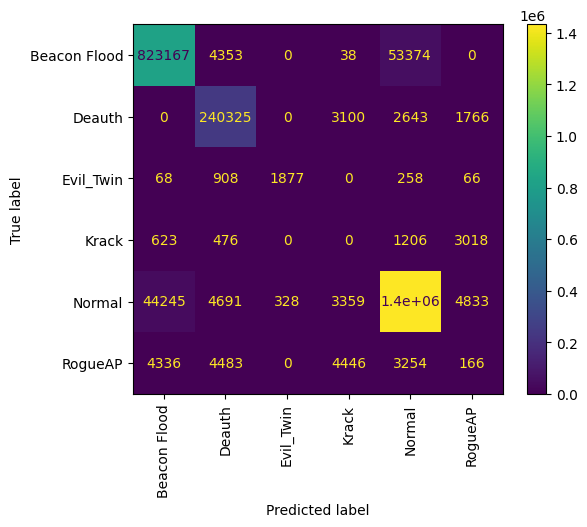

0.9448344299232526


In [17]:
from lightgbm import LGBMClassifier


light_gbm=LGBMClassifier()
light_gbm.fit(X_train,y_train)
acc = model_accuracy(light_gbm)
plt.savefig('lightgbm_cm_new.eps')
plt.show()
print(acc)

In [18]:
# Generate predictions
light_gbm_predictions = light_gbm.predict(X_test)

# Generate classification report as dictionary
light_gbm_report_dict = classification_report(y_test, light_gbm_predictions, output_dict=True)

# Extract performance metrics
light_gbm_accuracy = light_gbm_report_dict['accuracy']
light_gbm_precision = light_gbm_report_dict['macro avg']['precision']
light_gbm_recall = light_gbm_report_dict['macro avg']['recall']
light_gbm_f1_score = light_gbm_report_dict['macro avg']['f1-score']

# Print classification report
print("Classification Report:")
print(classification_report(y_test, light_gbm_predictions))

# Print extracted metrics
print(f"LightGBM Model Accuracy: {light_gbm_accuracy}")
print(f"LightGBM Model Precision: {light_gbm_precision}")
print(f"LightGBM Model Recall: {light_gbm_recall}")
print(f"LightGBM Model F1 Score: {light_gbm_f1_score}")

Classification Report:
              precision    recall  f1-score   support

Beacon Flood       0.94      0.93      0.94    880932
      Deauth       0.94      0.97      0.96    247834
   Evil_Twin       0.85      0.59      0.70      3177
       Krack       0.00      0.00      0.00      5323
      Normal       0.96      0.96      0.96   1490307
     RogueAP       0.02      0.01      0.01     16685

    accuracy                           0.94   2644258
   macro avg       0.62      0.58      0.59   2644258
weighted avg       0.94      0.94      0.94   2644258

LightGBM Model Accuracy: 0.9448344299232526
LightGBM Model Precision: 0.6187568654575591
LightGBM Model Recall: 0.5777222934318037
LightGBM Model F1 Score: 0.5941333389476289


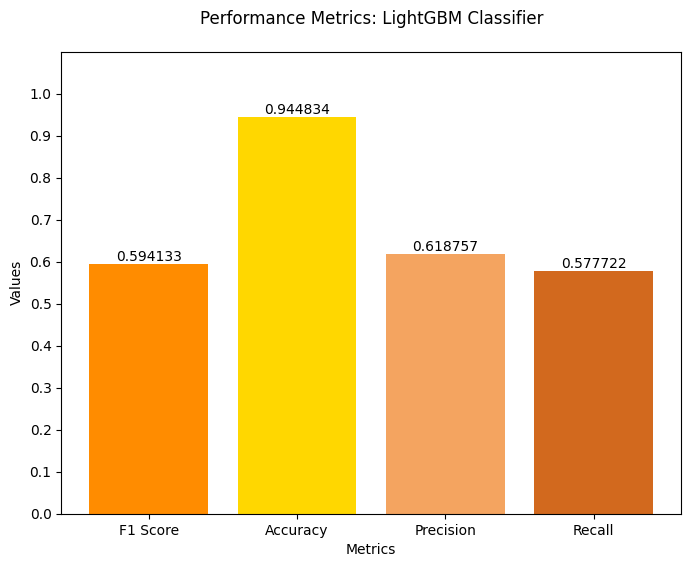

In [19]:
# Data for visualization
labels = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
values = [light_gbm_f1_score, light_gbm_accuracy, light_gbm_precision, light_gbm_recall]

# Plotting Performance Metrics Bar Chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['darkorange', 'gold', 'sandybrown', 'chocolate'])

# Adding title and labels with padding
plt.title('Performance Metrics: LightGBM Classifier', pad=20)
plt.xlabel('Metrics')
plt.ylabel('Values')

# Setting y-axis limit from 0 to 1
plt.ylim(0, 1.1)

# Setting tick locations on the y-axis
plt.yticks([i/10 for i in range(11)])  # Tick locations from 0.0 to 1.0 at intervals of 0.1

# Adding the value at the end of each bar with 6 decimal points
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.6f}'.format(value), 
             ha='center', va='bottom')

# Displaying the bar plot
plt.show()

In [20]:
joblib.dump(light_gbm, 'BoostingClassifier_light_gbm_model.pkl')

['BoostingClassifier_light_gbm_model.pkl']

# MULTI LAYER STACKING: ADA BOOST, LIGHT GBM WITH META MODEL: CAT BOOST

In [4]:
# Load saved models
adaboost_model = joblib.load('BoostingClassifier_ada_boost_model.pkl')
lightgbm_model = joblib.load('BoostingClassifier_light_gbm_model.pkl')
catboost_model = joblib.load('BoostingClassifier_catboost_model.pkl')

# Define base models
base_models = [
    ('adaboost', adaboost_model),
    ('lightgbm', lightgbm_model)
]

# Use the saved CatBoost model as the meta-model
meta_model = catboost_model

# Create stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True)

# Fit stacking model
stacking_model.fit(X_train, y_train)

# Generate predictions
stacking_predictions = stacking_model.predict(X_test)

C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.253972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1897
[LightGBM] [Info] Number of data points in the train set: 5368644, number of used features: 18
[LightGBM] [Info] Start training from score -1.100420
[LightGBM] [Info] Start training from score -2.365286
[LightGBM] [Info] Start training from score -6.665543
[LightGBM] [Info] Start training from score -6.219396
[LightGBM] [Info] Start training from score -0.573006
[LightGBM] [Info] Start training from score -5.074608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is depr

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.228819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1908
[LightGBM] [Info] Number of data points in the train set: 4294915, number of used features: 18
[LightGBM] [Info] Start training from score -1.100420
[LightGBM] [Info] Start training from score -2.365286
[LightGBM] [Info] Start training from score -6.665543
[LightGBM] [Info] Start training from score -6.219373
[LightGBM] [Info] Start training from score -0.573006
[LightGBM] [Info] Start training from score -5.074623
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
              precision    recall  f1-score   support

Beacon Flood       1.00      1.00      1.00    880932
      Deauth       1.00      1.00      1.00    247834
   Evil_Twin       1.00      1.00      1.00      3177
       Krack       1.00      1.00      1.00      5323
      Normal       1.00      1.00      1.00   1490307
     RogueAP       1.00      1.00      1.00     16685

    accuracy                           1.00   2644258
   macro avg       1.00      1.00      1.00   2644258
weighted avg       1.00      1.00      1.00   2644258

Stacking Model Accuracy: 0.9998
Stacking Model Precision: 0.9996
Stacking Model Recall: 0.9998
Stacking Model F1 Score: 0.9997


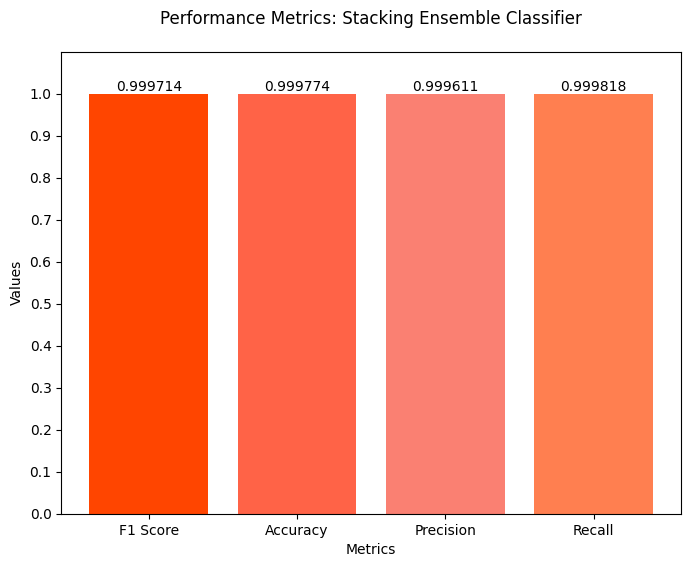

In [5]:
# Generate classification report as dictionary
stacking_report_dict = classification_report(y_test, stacking_predictions, output_dict=True)

# Extract performance metrics
stacking_accuracy = stacking_report_dict['accuracy']
stacking_precision = stacking_report_dict['macro avg']['precision']
stacking_recall = stacking_report_dict['macro avg']['recall']
stacking_f1_score = stacking_report_dict['macro avg']['f1-score']

# Print classification report
print("Classification Report:")
print(classification_report(y_test, stacking_predictions))

# Print extracted metrics
print(f"Stacking Model Accuracy: {stacking_accuracy}")
print(f"Stacking Model Precision: {stacking_precision}")
print(f"Stacking Model Recall: {stacking_recall}")
print(f"Stacking Model F1 Score: {stacking_f1_score}")

# Data for visualization
labels = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
values = [stacking_f1_score, stacking_accuracy, stacking_precision, stacking_recall]

# Plotting Performance Metrics Bar Chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['orangered', 'tomato', 'salmon', 'coral'])

# Adding title and labels with padding
plt.title('Performance Metrics: Stacking Ensemble Classifier', pad=20)
plt.xlabel('Metrics')
plt.ylabel('Values')

# Setting y-axis limit from 0 to 1
plt.ylim(0, 1.1)

# Setting tick locations on the y-axis
plt.yticks([i/10 for i in range(11)])  # Tick locations from 0.0 to 1.0 at intervals of 0.1

# Adding the value at the end of each bar with 6 decimal points
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.6f}'.format(value), 
             ha='center', va='bottom')

# Displaying the bar plot
plt.show()

In [ ]:
# Plot confusion matrix
import seaborn as sns


conf_matrix = confusion_matrix(y_test, stacking_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Stacked AdaBoost and LightGBM with CatBoost Meta Model')
plt.show()

# MULTI LAYER STACKING: GRADIENT BOOSTING, CAT BOOST with RANDOM FOREST Meta Model

C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.341446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1897
[LightGBM] [Info] Number of data points in the train set: 5368644, number of used features: 18
[LightGBM] [Info] Start training from score -1.100420
[LightGBM] [Info] Start training from score -2.365286
[LightGBM] [Info] Start training from score -6.665543
[LightGBM] [Info] Start training from score -6.219396
[LightGBM] [Info] Start training from score -0.573006
[LightGBM] [Info] Start training from score -5.074608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is depr

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.287944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1908
[LightGBM] [Info] Number of data points in the train set: 4294915, number of used features: 18
[LightGBM] [Info] Start training from score -1.100420
[LightGBM] [Info] Start training from score -2.365286
[LightGBM] [Info] Start training from score -6.665543
[LightGBM] [Info] Start training from score -6.219373
[LightGBM] [Info] Start training from score -0.573006
[LightGBM] [Info] Start training from score -5.074623
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

C:\Users\Levi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
              precision    recall  f1-score   support

Beacon Flood       1.00      1.00      1.00    880932
      Deauth       1.00      1.00      1.00    247834
   Evil_Twin       1.00      1.00      1.00      3177
       Krack       1.00      1.00      1.00      5323
      Normal       1.00      1.00      1.00   1490307
     RogueAP       1.00      1.00      1.00     16685

    accuracy                           1.00   2644258
   macro avg       1.00      1.00      1.00   2644258
weighted avg       1.00      1.00      1.00   2644258

Stacking Model Accuracy: 0.9999674766985672
Stacking Model Precision: 0.9997996562244484
Stacking Model Recall: 0.9993720393059382
Stacking Model F1 Score: 0.9995855928083318


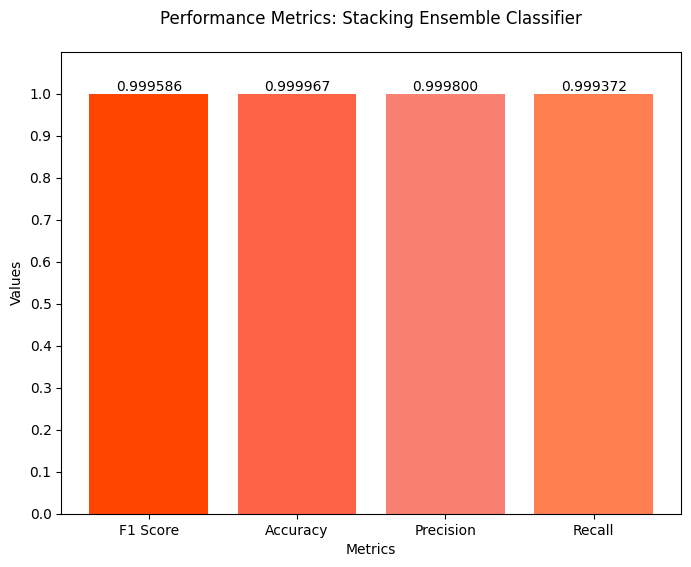

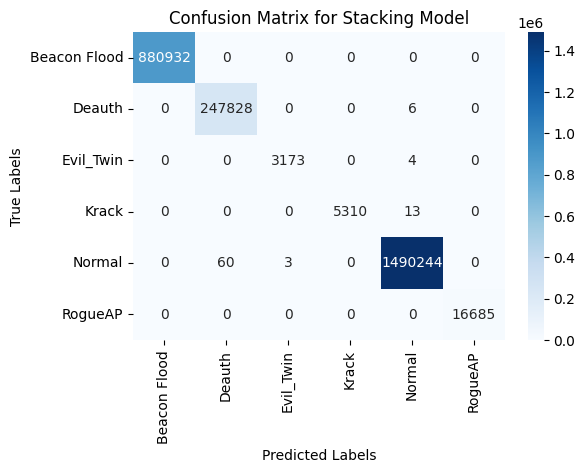

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from catboost import CatBoostClassifier

# Reshape y_train to avoid DataConversionWarning
y_train = np.ravel(y_train)


# Load saved models
adaboost_model = joblib.load('BoostingClassifier_ada_boost_model.pkl')
catboost_model = joblib.load('BoostingClassifier_catboost_model.pkl')  # Meta model
gradient_boosting_model = joblib.load('BoostingClassifier_gradient_boosting_model.pkl')
lightgbm_model = joblib.load('BoostingClassifier_light_gbm_model.pkl')

# Define base models
base_models = [
    ('adaboost', adaboost_model),
    ('gradient_boosting', gradient_boosting_model),
    ('lightgbm', lightgbm_model)
]

# Use the saved CatBoost model as the meta-model
meta_model = CatBoostClassifier(verbose=False)  # Ensuring it's re-trainable

# Create stacking classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Allows the meta-model to use both raw features & base model outputs
)

# Fit stacking model
stacking_model.fit(X_train, y_train)

# Generate predictions
stacking_predictions = stacking_model.predict(X_test)

# Generate classification report
stacking_report_dict = classification_report(y_test, stacking_predictions, output_dict=True)

# Extract performance metrics
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
stacking_precision = precision_score(y_test, stacking_predictions, average='macro')
stacking_recall = recall_score(y_test, stacking_predictions, average='macro')
stacking_f1_score = f1_score(y_test, stacking_predictions, average='macro')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, stacking_predictions))

# Print extracted metrics
print(f"Stacking Model Accuracy: {stacking_accuracy}")
print(f"Stacking Model Precision: {stacking_precision}")
print(f"Stacking Model Recall: {stacking_recall}")
print(f"Stacking Model F1 Score: {stacking_f1_score}")

# Data for visualization
labels = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
values = [stacking_f1_score, stacking_accuracy, stacking_precision, stacking_recall]

# Plotting Performance Metrics Bar Chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['orangered', 'tomato', 'salmon', 'coral'])

# Adding title and labels with padding
plt.title('Performance Metrics: Stacking Ensemble Classifier', pad=20)
plt.xlabel('Metrics')
plt.ylabel('Values')

# Setting y-axis limit from 0 to 1
plt.ylim(0, 1.1)
plt.yticks([i/10 for i in range(11)])

# Adding the value at the end of each bar with 6 decimal points
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.6f}'.format(value), 
             ha='center', va='bottom')

# Displaying the bar plot
plt.show()

# 🎯 Confusion Matrix Plot
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, stacking_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Stacking Model')
plt.show()


In [8]:
joblib.dump(stacking_model, 'stacking_model.pkl')

['stacking_model.pkl']

# Stacking Model V2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Load datasets from CSV
print("[*] Loading dataset from CSV files...")
train_df = pd.read_csv("X_train.csv")
test_df = pd.read_csv("X_test.csv")
train_labels = pd.read_csv("y_train.csv")
test_labels = pd.read_csv("y_test.csv")

# Convert to NumPy arrays
v_X_train = train_df.values
v_X_test = test_df.values
v_y_train = train_labels.values.ravel()  # Flatten to avoid shape issues
v_y_test = test_labels.values.ravel()

print(f"Training set shape: {v_X_train.shape}, Labels: {v_y_train.shape}")
print(f"Testing set shape: {v_X_test.shape}, Labels: {v_y_test.shape}")

# Define base models with optimized hyperparameters
base_models = [
    ('catboost', CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, verbose=False)),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=5)),
    ('lightgbm', LGBMClassifier(n_estimators=400, learning_rate=0.08, max_depth=7))
]

# Define meta-model (Random Forest with tuned hyperparameters)
meta_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Create stacking classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Allows the meta-model to use both raw features & base model outputs
)

# Train stacking model
print("[*] Training the Stacking Model...")
stacking_model.fit(v_X_train, v_y_train)

# Generate predictions
stacking_predictions = stacking_model.predict(v_X_test)

# Generate classification report
stacking_report_dict = classification_report(v_y_test, stacking_predictions, output_dict=True)

# Extract performance metrics
stacking_accuracy = accuracy_score(v_y_test, stacking_predictions)
stacking_precision = precision_score(v_y_test, stacking_predictions, average='macro')
stacking_recall = recall_score(v_y_test, stacking_predictions, average='macro')
stacking_f1_score = f1_score(v_y_test, stacking_predictions, average='macro')

# Print classification report
print("\nClassification Report:")
print(classification_report(v_y_test, stacking_predictions))

# Print extracted metrics
print(f"\nStacking Model Accuracy: {stacking_accuracy:.4f}")
print(f"Stacking Model Precision: {stacking_precision:.4f}")
print(f"Stacking Model Recall: {stacking_recall:.4f}")
print(f"Stacking Model F1 Score: {stacking_f1_score:.4f}")

# Data for visualization
labels = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
values = [stacking_f1_score, stacking_accuracy, stacking_precision, stacking_recall]

# Plot Performance Metrics Bar Chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['orangered', 'tomato', 'salmon', 'coral'])

# Adding title and labels with padding
plt.title('Performance Metrics: Stacking Ensemble Classifier', pad=20)
plt.xlabel('Metrics')
plt.ylabel('Values')

# Setting y-axis limit from 0 to 1
plt.ylim(0, 1.1)
plt.yticks([i/10 for i in range(11)])

# Adding value labels to bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.6f}'.format(value), 
             ha='center', va='bottom')

# Display bar plot
plt.show()

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
cm = confusion_matrix(v_y_test, stacking_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(v_y_test), yticklabels=np.unique(v_y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Stacking Model')
plt.show()


[*] Loading dataset from CSV files...
Training set shape: (5368644, 18), Labels: (5368644,)
Testing set shape: (2644258, 18), Labels: (2644258,)
[*] Training the Stacking Model...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.352066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1897
[LightGBM] [Info] Number of data points in the train set: 5368644, number of used features: 18
[LightGBM] [Info] Start training from score -1.100420
[LightGBM] [Info] Start training from score -2.365286
[LightGBM] [Info] Start training from score -6.665543
[LightGBM] [Info] Start training from score

In [ ]:
import joblib

# Save the trained stacking model
joblib.dump(stacking_model, "stacking_model_v2.pkl")

print("[+] Stacking model saved as stacking_model_v2.pkl")